# Mesh features

In this example, we will explore the various meshing features available in ospgrillage.

First, the necessary imports:


In [1]:
import numpy as np
import ospgrillage as og 
from IPython import display  # to display images in this notebook
%matplotlib inline

Then, we define the properties as per Super-T bridge example. 

In [8]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# parameters of bridge grillage
L = 33.5 * m  # span
w = 11.565 * m  # width
n_l = 7  # number of longitudinal members
n_t = 11  # number of transverse members
edge_dist = 1.05 * m  # distance between edge beam and first exterior beam

Here we introduce a few new variables to explore the various meshing features.

In [9]:
angle = 0  
offset_beam_y = 0.499 * m
max_mesh_size_z = 1 * m
max_mesh_size_x = 1 * m
link_nodes_width = 0.89 * m

First we create and define the sections and material for each grillage elements of the models.

In [16]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A=1.025 * m2,
    J=0.1878 * m3,
    Iz=0.3694 * m4,
    Iy=0.113887e-3 * m4,
    Az=0.0371929 * m2,
    Ay=0.0371902 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)

## Oblique mesh with skew angle

Here we create the grillage model with a skew angle of 20 degree and oblique mesh type.

In [11]:
oblique_grillage = og.create_grillage(
    bridge_name="Oblique_28m",
    long_dim=10,
    width=7,
    skew=20,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    edge_beam_dist=1,
    mesh_type="Oblique",
)


Assign the grillage members to the model and create grillage

No Model_ODB specified, trying to get data from the active model.
3D model


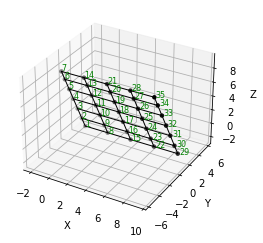

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [12]:
oblique_grillage.set_member(longitudinal_beam, member="interior_main_beam")
oblique_grillage.set_member(longitudinal_beam, member="exterior_main_beam_1")
oblique_grillage.set_member(longitudinal_beam, member="exterior_main_beam_2")
oblique_grillage.set_member(edge_longitudinal_beam, member="edge_beam")
oblique_grillage.set_member(transverse_slab, member="transverse_slab")
oblique_grillage.set_member(end_transverse_slab, member="start_edge")
oblique_grillage.set_member(end_transverse_slab, member="end_edge")

oblique_grillage.create_osp_model(
    pyfile=False
)  
og.opsplt.plot_model(show_nodes="yes",show_nodetags="yes",)

## Orthogonal mesh with negative skew angle

Here we create the same model but instead with orthogonal mesh type and a negative skew angle - defined as -20. The latter creates a mesh that skews (angle) towards the right instead of left. 

In [14]:
ortho_grillage = og.create_grillage(
    bridge_name="Oblique_28m",
    long_dim=10,
    width=7,
    skew=-20,
    num_long_grid=n_l,
    num_trans_grid=5,
    edge_beam_dist=1,
    mesh_type="Ortho",
)


Edge mesh @ start span completed
Edge mesh @ end span completed


No Model_ODB specified, trying to get data from the active model.
3D model


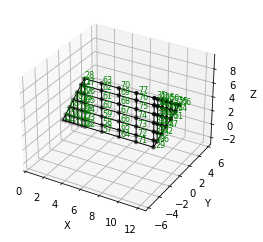

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [15]:
ortho_grillage.set_member(longitudinal_beam, member="interior_main_beam")
ortho_grillage.set_member(longitudinal_beam, member="exterior_main_beam_1")
ortho_grillage.set_member(longitudinal_beam, member="exterior_main_beam_2")
ortho_grillage.set_member(edge_longitudinal_beam, member="edge_beam")
ortho_grillage.set_member(transverse_slab, member="transverse_slab")
ortho_grillage.set_member(end_transverse_slab, member="start_edge")
ortho_grillage.set_member(end_transverse_slab, member="end_edge")

ortho_grillage.create_osp_model(
    pyfile=False
)  
og.opsplt.plot_model(show_nodes="yes",show_nodetags="yes",)

## Skew mesh with distinct edge angles

Different skew angles can be defined for the support edges. Here we create a mesh where the left and right support edges are 40 and 0 degrees respectively. To do this, pass a list containing two elements - the angles of the skew edges - to the skew keyword argument.

In [17]:
varied_edge_angle_grillage = og.create_grillage(
    bridge_name="SuperT_10m",
    long_dim=10,
    width=7,
    skew=[40, 0],
    num_long_grid=7,
    num_trans_grid=5,
    edge_beam_dist=1,
    mesh_type="Ortho",
)



Edge mesh @ start span completed


No Model_ODB specified, trying to get data from the active model.
3D model


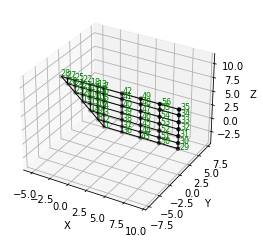

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [18]:
varied_edge_angle_grillage.set_member(longitudinal_beam, member="interior_main_beam")
varied_edge_angle_grillage.set_member(longitudinal_beam, member="exterior_main_beam_1")
varied_edge_angle_grillage.set_member(longitudinal_beam, member="exterior_main_beam_2")
varied_edge_angle_grillage.set_member(edge_longitudinal_beam, member="edge_beam")
varied_edge_angle_grillage.set_member(transverse_slab, member="transverse_slab")
varied_edge_angle_grillage.set_member(end_transverse_slab, member="start_edge")
varied_edge_angle_grillage.set_member(end_transverse_slab, member="end_edge")

varied_edge_angle_grillage.create_osp_model(
    pyfile=False
)  
og.opsplt.plot_model(show_nodes="yes",show_nodetags="yes",)